In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

### Reading the data

We have 2 different data available
- Randomized Discount: This data is precious and we use it for test and also can handle the bias problem
- Non-Randomized Discount : We will use this data for training

In [2]:
train = pd.read_csv("./non_rand_discount.csv", sep=";")
test = pd.read_csv("./random_data.csv")

In [3]:
test.columns

Index(['spend_1m_baby', 'spend_2m_baby', 'spend_3m_baby', 'spend_4m_baby',
       'spend_5m_baby', 'spend_6m_baby', 'spend_1m_clothes',
       'spend_2m_clothes', 'spend_3m_clothes', 'spend_4m_clothes',
       'spend_5m_clothes', 'spend_6m_clothes', 'spend_1m_health',
       'spend_2m_health', 'spend_3m_health', 'spend_4m_health',
       'spend_5m_health', 'spend_6m_health', 'spend_1m_pet', 'spend_2m_pet',
       'spend_3m_pet', 'spend_4m_pet', 'spend_5m_pet', 'spend_6m_pet',
       'spend_1m_groceries', 'spend_2m_groceries', 'spend_3m_groceries',
       'spend_4m_groceries', 'spend_5m_groceries', 'spend_6m_groceries',
       'spend_1m_eletronic', 'spend_2m_eletronic', 'spend_3m_eletronic',
       'spend_4m_eletronic', 'spend_5m_eletronic', 'spend_6m_eletronic',
       'sales', 'discount', 'age', 'gender', 'cust_state', 'tenure', 'profit'],
      dtype='object')

In [4]:
train.columns

Index(['spend_1m_baby', 'spend_2m_baby', 'spend_3m_baby', 'spend_4m_baby',
       'spend_5m_baby', 'spend_6m_baby', 'spend_1m_clothes',
       'spend_2m_clothes', 'spend_3m_clothes', 'spend_4m_clothes',
       'spend_5m_clothes', 'spend_6m_clothes', 'spend_1m_health',
       'spend_2m_health', 'spend_3m_health', 'spend_4m_health',
       'spend_5m_health', 'spend_6m_health', 'spend_1m_pet', 'spend_2m_pet',
       'spend_3m_pet', 'spend_4m_pet', 'spend_5m_pet', 'spend_6m_pet',
       'spend_1m_groceries', 'spend_2m_groceries', 'spend_3m_groceries',
       'spend_4m_groceries', 'spend_5m_groceries', 'spend_6m_groceries',
       'spend_1m_eletronic', 'spend_2m_eletronic', 'spend_3m_eletronic',
       'spend_4m_eletronic', 'spend_5m_eletronic', 'spend_6m_eletronic',
       'sales', 'discount', 'profit', 'age', 'gender', 'cust_state', 'tenure',
       'sales_prediction_bins', 'sales_prediction'],
      dtype='object')

In [5]:
print(train.shape, test.shape)

(15000, 45) (5000, 43)


In [6]:
train.head()

,spend_1m_baby,spend_2m_baby,spend_3m_baby,spend_4m_baby,spend_5m_baby,spend_6m_baby,spend_1m_clothes,spend_2m_clothes,spend_3m_clothes,spend_4m_clothes,...,spend_6m_eletronic,sales,discount,profit,age,gender,cust_state,tenure,sales_prediction_bins,sales_prediction
0,0,0,0,0,0,0.0,0,0.0,0.0,0.0,...,0.0,3368.64,US$ 125.0,40.06,40,1.0,MA,6,8,1351.024765
1,0,0,0,0,0,0.0,0,0.0,0.0,0.0,...,0.0,2133.10,US$ 75.0,29.52,36,0.0,MG,10,4,1035.580387
2,0,0,0,0,0,0.0,0,0.0,0.0,0.0,...,0.0,2001.62,US$ 50.0,48.08,34,0.0,RJ,7,3,992.401825
3,0,0,0,0,0,0.0,0,0.0,0.0,0.0,...,0.0,1461.96,US$ 10.0,61.64,31,0.0,BA,7,1,919.720735
4,0,0,0,0,0,0.0,0,0.0,0.0,0.0,...,0.0,2743.72,US$ 100.0,34.44,32,1.0,PB,6,6,1176.485681


Both tables have almost the same columns. The non randomized data has two sales prediction columns that are not present in the randomized data.

In [7]:
train.dtypes

spend_1m_baby              int64
spend_2m_baby              int64
spend_3m_baby              int64
spend_4m_baby              int64
spend_5m_baby              int64
spend_6m_baby            float64
spend_1m_clothes           int64
spend_2m_clothes         float64
spend_3m_clothes         float64
spend_4m_clothes         float64
spend_5m_clothes         float64
spend_6m_clothes         float64
spend_1m_health            int64
spend_2m_health            int64
spend_3m_health            int64
spend_4m_health            int64
spend_5m_health            int64
spend_6m_health            int64
spend_1m_pet               int64
spend_2m_pet               int64
spend_3m_pet               int64
spend_4m_pet               int64
spend_5m_pet               int64
spend_6m_pet               int64
spend_1m_groceries         int64
spend_2m_groceries         int64
spend_3m_groceries       float64
spend_4m_groceries       float64
spend_5m_groceries       float64
spend_6m_groceries       float64
spend_1m_e

In [8]:
#correcting the discount data type
train["discount"] = train["discount"].str.split(" ").str[-1].astype(float)

### Correlation of discounts with profits

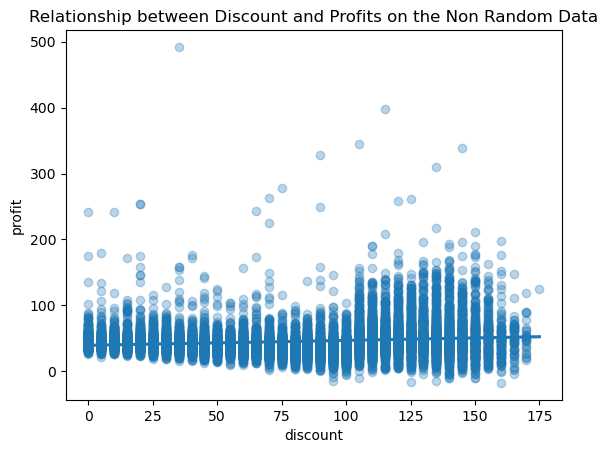

In [9]:
np.random.seed(123) # for reproducibility
sns.regplot(data = train, x="discount", y="profit", scatter_kws={"alpha":0.3})
plt.title("Relationship between Discount and Profits on the Non Random Data");

This plot shows a positive relationship between discount and profits. We cannot say this relationship is causal, because there might be confounding variables that were unaccounted for.

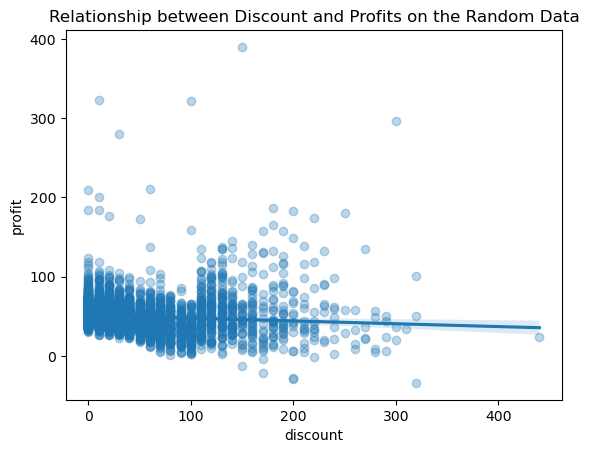

In [10]:
np.random.seed(123) # for reproducibility
sns.regplot(data = test, x="discount", y="profit", scatter_kws={"alpha":0.3})
plt.title("Relationship between Discount and Profits on the Random Data");

This plot has a negative relationship between discount and profits. Since discount was randomly assigned in this dataset, we can say that this relationship captures the causal effect of discount on profits.

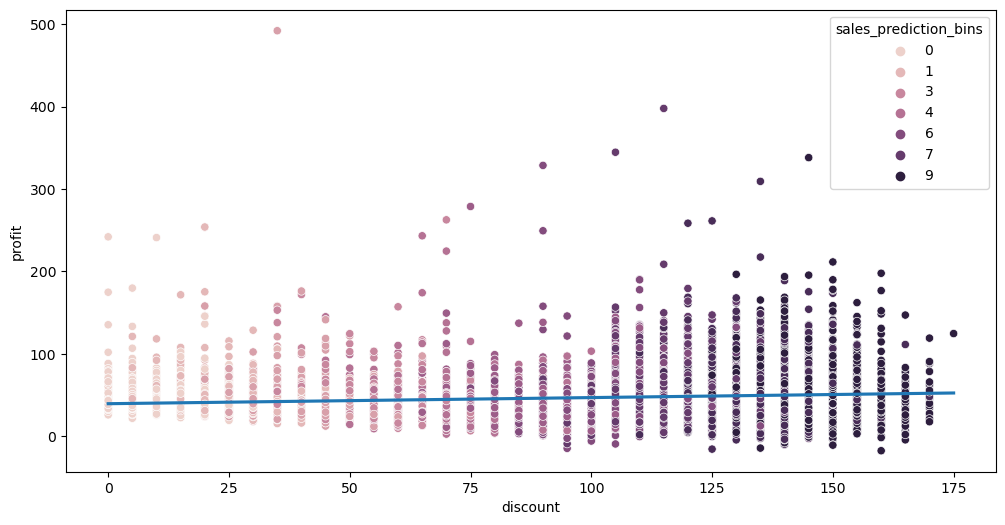

In [11]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=train,x="discount", y="profit", hue="sales_prediction_bins")
sns.regplot(x="discount", y="profit", data=train, scatter=False);

The relationship between profit and discount seems to be positive. We probably can't interpret this relationship as causal, because customers with higher discounts also have higher sales predictions. Hence
 
$$
E[Profit_0|Discount=High] >  E[Profit_0|Discount=Low]
$$
 
In other words, high discount customers would still buy more than low discount customers even in the absence of high discounts. 

## Using Double ML to estimate the effect of discount on Profits

We will use FWL theorm for our double ML.
- Profit  = Discount + Other Predictors
- Build a ML model to predict profit using other predictors (Profit ~ Other Predictors)
- Build a ML model to predict Discount using other Predictors (Discount ~ Other Predictors)
- Build a LR model of residuals (profit_res ~ discount_res)

In [12]:
cust_state_avg_sales = train.groupby('cust_state')['sales'].mean().to_dict()

def state_to_numeric(df):
    return df.assign(cust_state_num = df["cust_state"].replace(cust_state_avg_sales))
    

In [13]:
train_processed = state_to_numeric(train)
train_processed.head()

,spend_1m_baby,spend_2m_baby,spend_3m_baby,spend_4m_baby,spend_5m_baby,spend_6m_baby,spend_1m_clothes,spend_2m_clothes,spend_3m_clothes,spend_4m_clothes,...,sales,discount,profit,age,gender,cust_state,tenure,sales_prediction_bins,sales_prediction,cust_state_num
0,0,0,0,0,0,0.0,0,0.0,0.0,0.0,...,3368.64,125.0,40.06,40,1.0,MA,6,8,1351.024765,2579.424297
1,0,0,0,0,0,0.0,0,0.0,0.0,0.0,...,2133.10,75.0,29.52,36,0.0,MG,10,4,1035.580387,2553.222774
2,0,0,0,0,0,0.0,0,0.0,0.0,0.0,...,2001.62,50.0,48.08,34,0.0,RJ,7,3,992.401825,2518.635848
3,0,0,0,0,0,0.0,0,0.0,0.0,0.0,...,1461.96,10.0,61.64,31,0.0,BA,7,1,919.720735,2446.648394
4,0,0,0,0,0,0.0,0,0.0,0.0,0.0,...,2743.72,100.0,34.44,32,1.0,PB,6,6,1176.485681,2562.461439


- Discount ~ f (Other Predictors)

In [15]:
from sklearn.model_selection import cross_val_predict

not_features = ["sales", "profit", "cust_state", "discount"]

X = list(train_processed.drop(columns=not_features).columns)
T = "discount"

np.random.seed(123)

debias_m = XGBRegressor(max_depth=3)
t_res = train[T] - cross_val_predict(debias_m, train_processed[X], train_processed[T], cv=3)

train_debiased = train_processed.assign(discount_res = t_res)

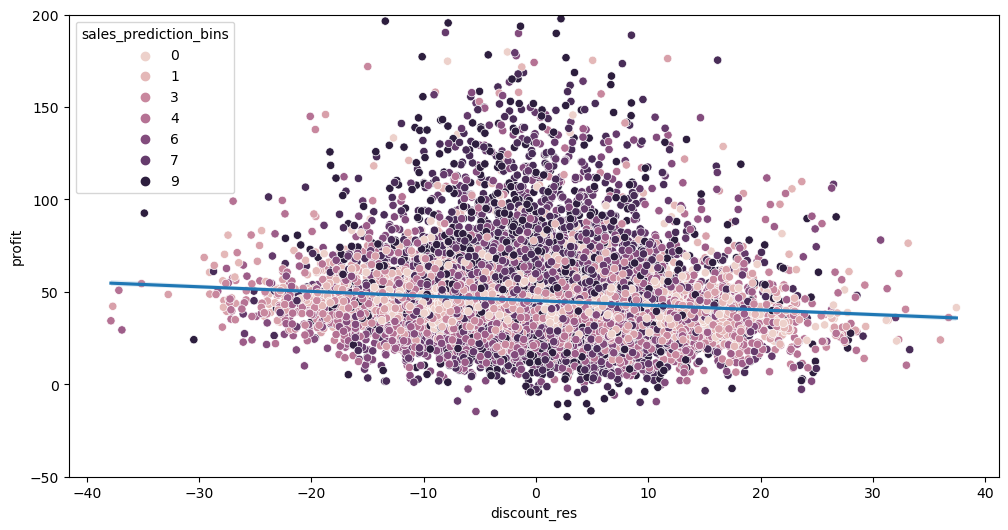

In [18]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=train_debiased, x="discount_res", y="profit", hue="sales_prediction_bins")
sns.regplot(x="discount_res", y="profit", data=train_debiased, scatter=False)
plt.ylim(-50, 200);

Using machine learning models, we can see that the bias diminishes. We are now able to find a negative relationship between discount and sales. However, we can see that the bias is not completely gone, as customers with low sales predictions (sales_prediction_bins=0 and 1) are still concentrated in the low discount regions. So, low and high discount customers are still not 100% comparable. 

- Profit - f (Other Predictors)

In [16]:
Y = "profit"

np.random.seed(123)

denoise_m = XGBRegressor(max_depth=3)

y_res = train[Y] - cross_val_predict(debias_m, train_processed[X], train_processed[Y], cv=3)

train_denoised = train_debiased.assign(profit_res = y_res)

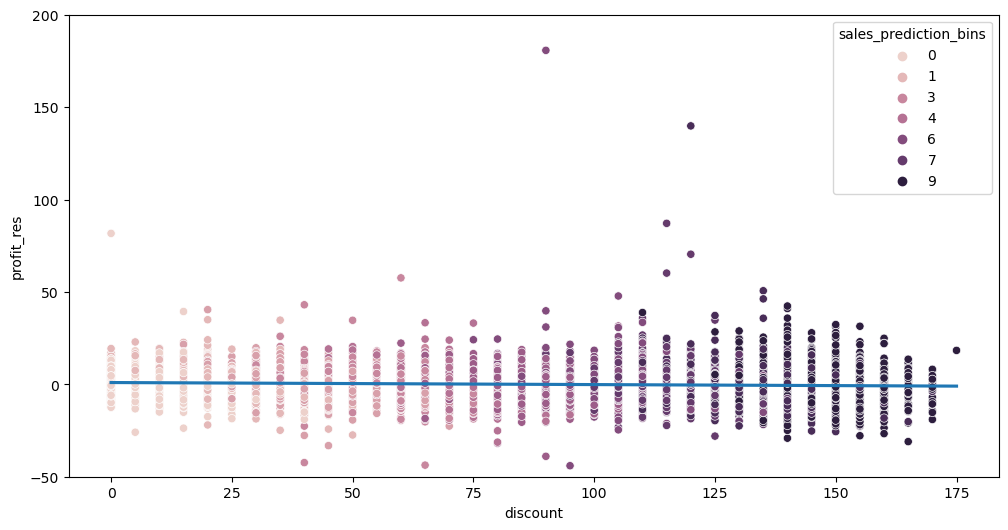

In [17]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=train_denoised, x="discount", y="profit_res", hue="sales_prediction_bins")
sns.regplot(x="discount", y="profit_res", data=train_denoised, scatter=False)
plt.ylim(-50, 200);

The denoising step in the FWL theorem doesn't change the direction of the relationship between discount and profits. However, it significantly reduces variance in the outcome variable (profit), making the relationship between discount and profit more apparent.

In [19]:
final_model = smf.ols("profit_res~discount_res", data=train_denoised).fit()

final_model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,0.1065,0.060,1.769,0.077,-0.012,0.224
discount_res,-0.2415,0.007,-36.136,0.000,-0.255,-0.228


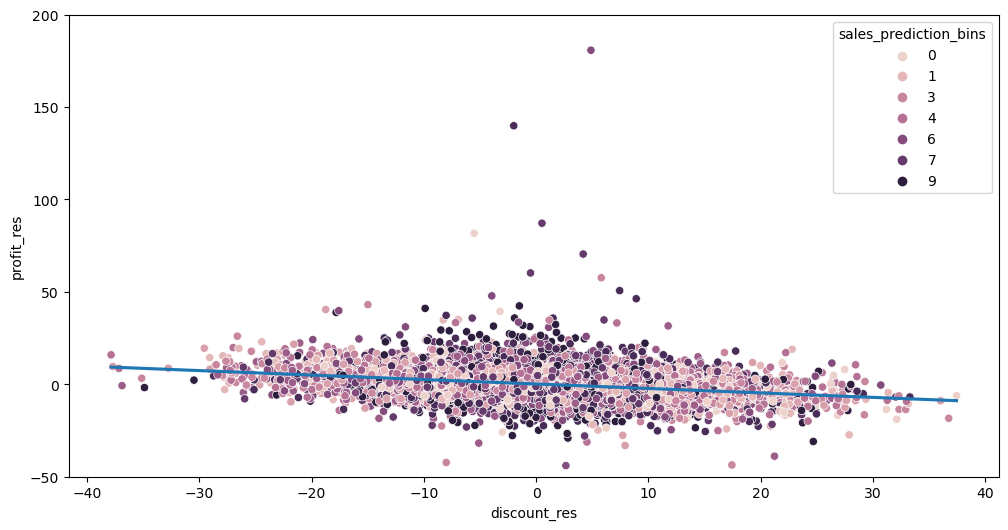

In [20]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=train_denoised, x="discount_res", y="profit_res", hue="sales_prediction_bins")
sns.regplot(x="discount_res", y="profit_res", data=train_denoised, scatter=False)
plt.ylim(-50, 200);

Just like when we controlled for `sales_prediction_bins` when using regression to estimate the impact of discount on profits, using Double/Debiased ML also yielded a negative coefficient. It looks like increasing the discount in one unit will decrease profits by about 0.23 units.

#### Personalizing discounts

In [21]:
train_denoised.head()

,spend_1m_baby,spend_2m_baby,spend_3m_baby,spend_4m_baby,spend_5m_baby,spend_6m_baby,spend_1m_clothes,spend_2m_clothes,spend_3m_clothes,spend_4m_clothes,...,profit,age,gender,cust_state,tenure,sales_prediction_bins,sales_prediction,cust_state_num,discount_res,profit_res
0,0,0,0,0,0,0.0,0,0.0,0.0,0.0,...,40.06,40,1.0,MA,6,8,1351.024765,2579.424297,-8.495590,-0.573392
1,0,0,0,0,0,0.0,0,0.0,0.0,0.0,...,29.52,36,0.0,MG,10,4,1035.580387,2553.222774,8.110825,-4.039074
2,0,0,0,0,0,0.0,0,0.0,0.0,0.0,...,48.08,34,0.0,RJ,7,3,992.401825,2518.635848,0.866100,1.674299
3,0,0,0,0,0,0.0,0,0.0,0.0,0.0,...,61.64,31,0.0,BA,7,1,919.720735,2446.648394,-18.932997,3.303521
4,0,0,0,0,0,0.0,0,0.0,0.0,0.0,...,34.44,32,1.0,PB,6,6,1176.485681,2562.461439,0.154785,4.278652


In [22]:
T

'discount'

In [23]:
# create the weights
w = train_denoised[f"{T}_res"] ** 2 
 
# create the transformed target
y_star = (train_denoised[f"{Y}_res"] / train_denoised[f"{T}_res"])

In [24]:
not_features_final_model = ["sales", "profit", "cust_state", "discount", "sales_prediction", "sales_prediction_bins"]
X_final_model = list(train_processed.drop(columns=not_features_final_model).columns)


model_final = XGBRegressor(max_depth=3)
 

# use a weighted regression ML model to predict the target with the weights.
model_final.fit(X=train_denoised[X_final_model], y=y_star, sample_weight=w);

In [28]:
test_pred = test.assign(cate=model_final.predict(test.pipe(state_to_numeric)[X_final_model]))

test_pred.head()

,spend_1m_baby,spend_2m_baby,spend_3m_baby,spend_4m_baby,spend_5m_baby,spend_6m_baby,spend_1m_clothes,spend_2m_clothes,spend_3m_clothes,spend_4m_clothes,...,spend_5m_eletronic,spend_6m_eletronic,sales,discount,age,gender,cust_state,tenure,profit,cate
0,0,0,0,0,0,0.0,25,50.0,0.0,0.0,...,0.0,0.0,1503.22,20.0,35,1.0,MA,23,55.16,-0.219785
1,0,0,0,0,0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,1798.30,60.0,29,1.0,MG,18,29.92,-0.301213
2,0,0,0,0,0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,1122.97,0.0,30,1.0,RJ,20,56.15,-0.278782
3,10,15,0,25,10,0.0,0,0.0,0.0,0.0,...,0.0,0.0,1217.08,10.0,32,0.0,BA,20,50.85,-0.330659
4,0,0,0,0,0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,966.58,0.0,30,0.0,PB,22,48.33,-0.281940


In [31]:
print(test_pred.query('cate <= 0').shape[0])
print(test_pred.query('cate > 0').shape[0])

4905
95


In [32]:
def elast(data, t, y):
    '''
    Calculates the ratio of covariance between y and t to the variance of t,i.e., how much y chnages with respect to t
    '''
    cov_matrix = np.cov(data[y], data[t])
    return cov_matrix[1, 0] / cov_matrix[1, 1]

In [33]:
def cumulative_elast_curve(dataset, prediction, y, t, min_periods=30, steps=100, ascending=False):
    '''Calculates the cumulative elasticity if order the data by cate in a stepwise fashion with stepsize = 50 starting from 30'''
    size = dataset.shape[0]
    ordered_df = dataset.sort_values(prediction, ascending=ascending).reset_index(drop=True)
    n_rows = list(range(min_periods, size, size // steps)) + [size]
    return np.array([elast(ordered_df.head(rows), t, y) for rows in n_rows])

What is Cumulative Gain?

Cumulative Gain measures the total gain in positive responses (i.e., uplift) achieved by targeting a specific portion of the population using the uplift model's predictions.

**It helps answer the question: "If we target the top X% of individuals ranked by uplift score, what proportion of the maximum possible uplift can we capture?"**

How Cumulative Gain Works
1. Rank Individuals by Uplift Score: The individuals in your dataset are ranked from highest to lowest based on the uplift scores predicted by the model. The uplift score represents how much more likely an individual is to respond positively if given the treatment compared to not receiving it.

2. Calculate Uplift in Segments:
- The population is divided into segments (usually in deciles or percentiles) based on their uplift scores.
- For each segment, measure the actual uplift by comparing the treatment group to a control group.

3. Plot Cumulative Gain Curve:

- The x-axis represents the proportion of the population targeted (e.g., the top 10%, 20%, etc.).
- The y-axis shows the cumulative gain in uplift achieved by targeting up to that proportion of individuals.
- The curve shows how much incremental gain you can achieve by focusing on individuals with higher predicted uplift scores.

In [34]:
def cumulative_gain(dataset, prediction, y, t, min_periods=30, steps=100, ascending=False):
    size = dataset.shape[0]
    ordered_df = dataset.sort_values(prediction, ascending=ascending).reset_index(drop=True)
    n_rows = list(range(min_periods, size, size // steps)) + [size]
    return np.array([elast(ordered_df.head(rows), t, y) * (rows/size) for rows in n_rows])

#### Cumulative elasticity curves

In [40]:
cum_elast_cate = cumulative_elast_curve(test_pred, "cate", y="profit", t="discount")
cum_elast_age = cumulative_elast_curve(test_pred, "age", y="profit", t="discount")

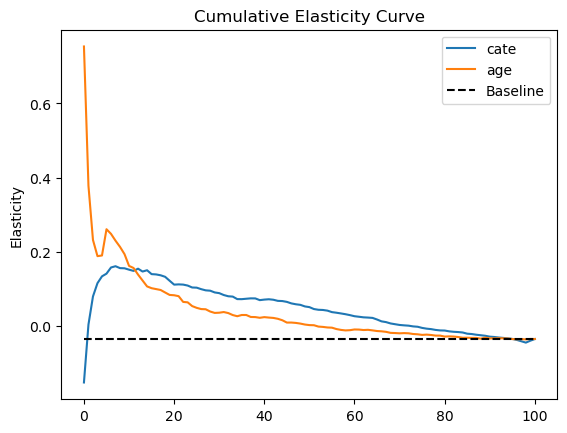

In [41]:
plt.plot(cum_elast_cate, label="cate")
plt.plot(cum_elast_age, label="age")
plt.hlines(elast(test_pred, "discount", "profit"), 0, 100, linestyle="--", color="black", label="Baseline")
plt.ylabel("Elasticity")
plt.title("Cumulative Elasticity Curve")
plt.legend();

 The cumulative elasticity curve shows that our treatment effect (TE) model starts further from the ATE and converges slowlier to it. This means that the model is better at distinguishing customers with high TE from those with low TE. It looks better than simply using Age, but not by much. 

In [42]:
gain_cate = cumulative_gain(test_pred, "cate", y="profit", t="discount", ascending=False)
gain_age = cumulative_gain(test_pred, "age", y="profit", t="discount", ascending=False)

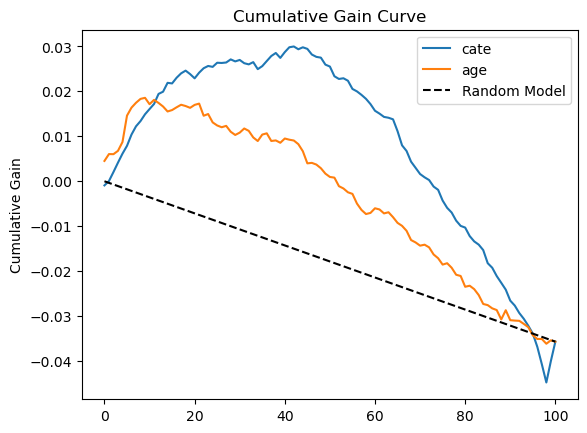

In [43]:
plt.plot(gain_cate, label="cate")
plt.plot(gain_age, label="age")

plt.plot([0, 100], [0, elast(test_pred, "discount", "profit")], linestyle="--", label="Random Model", color="black")

plt.ylabel("Cumulative Gain")
plt.title("Cumulative Gain Curve")
plt.legend();

The cumulative gain curve tells a different story. While simply ordering by Age is better at distinguishing customers with a very positive treatment effect (the age curve starts above out model’s curve), our model is clearly better than simply using age to distinguish between customers with low and high treatment effects. 

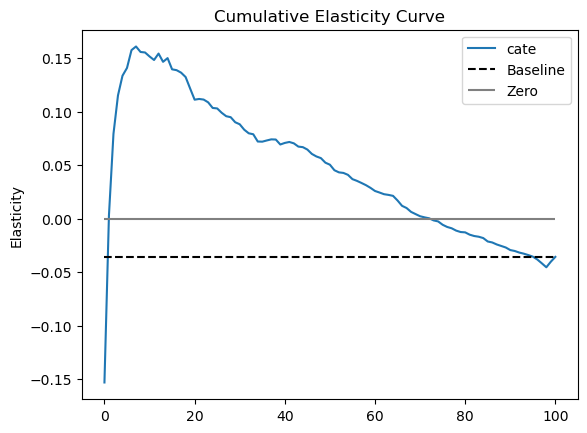

In [44]:
plt.plot(cum_elast_cate, label="cate")
plt.hlines(elast(test_pred, "discount", "profit"), 0, 100, linestyle="--", color="black", label="Baseline")
plt.hlines(0, 0, 100, linestyle="-", color="Grey", label="Zero")
plt.ylabel("Elasticity")
plt.title("Cumulative Elasticity Curve")
plt.legend();

The cumulative elasticity curve says that, if we sort customers according to our treatment effect model, the top 60% of customers would all have a positive treatment effect. This means that, if we increase the discount for them, we would also increase profits. To add some conservatism to our recommendation, we could say that the e-commerce company should give discounts to whomever has a TE prediction above the 40 percentile

In [70]:
np.quantile(test_pred["cate"], 0.4)

-0.2469276338815689